In [4]:
!pip install pandas_datareader

In [6]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from datetime import date

In [12]:
report_start = date.fromisoformat('2008-10-01')
report_end = date.today()

# Limit the display of dataframes to 25 rows max
pd.options.display.max_rows = 25

# Indicate representation in Billions
pd.options.display.float_format = '${:,.2f}bn'.format


#[Let's indicate the variables of interest to us, and use FRED's API to pull that information.]

sec_held_outright = web.get_data_fred(['WSHOTSL', 'WSHOMCB', 'WSHOFADSL', 'WLCFLL', 'WORAL'],
                                      start=report_start, end=report_end).asfreq('W-Wed')

# Converting into billions of USD
sec_held_outright /= 1000.

In [14]:
SEC_HELD_OUTRIGHT_COMPOSITION_TITLE = 'Federal Reserve Banks: Securities held outright (at face value)'
SEC_HELD_OUTRIGHT_AND_LOANS_COMPOSITION_TITLE = SEC_HELD_OUTRIGHT_COMPOSITION_TITLE + ' and Emergency Loans'
SEC_HELD_OUTRIGHT_SPEED = 'Speed of Quantitative Easing or Tapering in Billions of USD per month'
SEC_HELD_OUTRIGHT_SPEED_MA = 'Speed of Quantitative Easing or Tapering in Billions of USD per month (moving average over one quarter)'
LEFT_Y_AXIS_LABEL = 'Billions of USD'
LEFT_Y_AXIS_LABEL_SPEED = 'Billions of USD per Month'



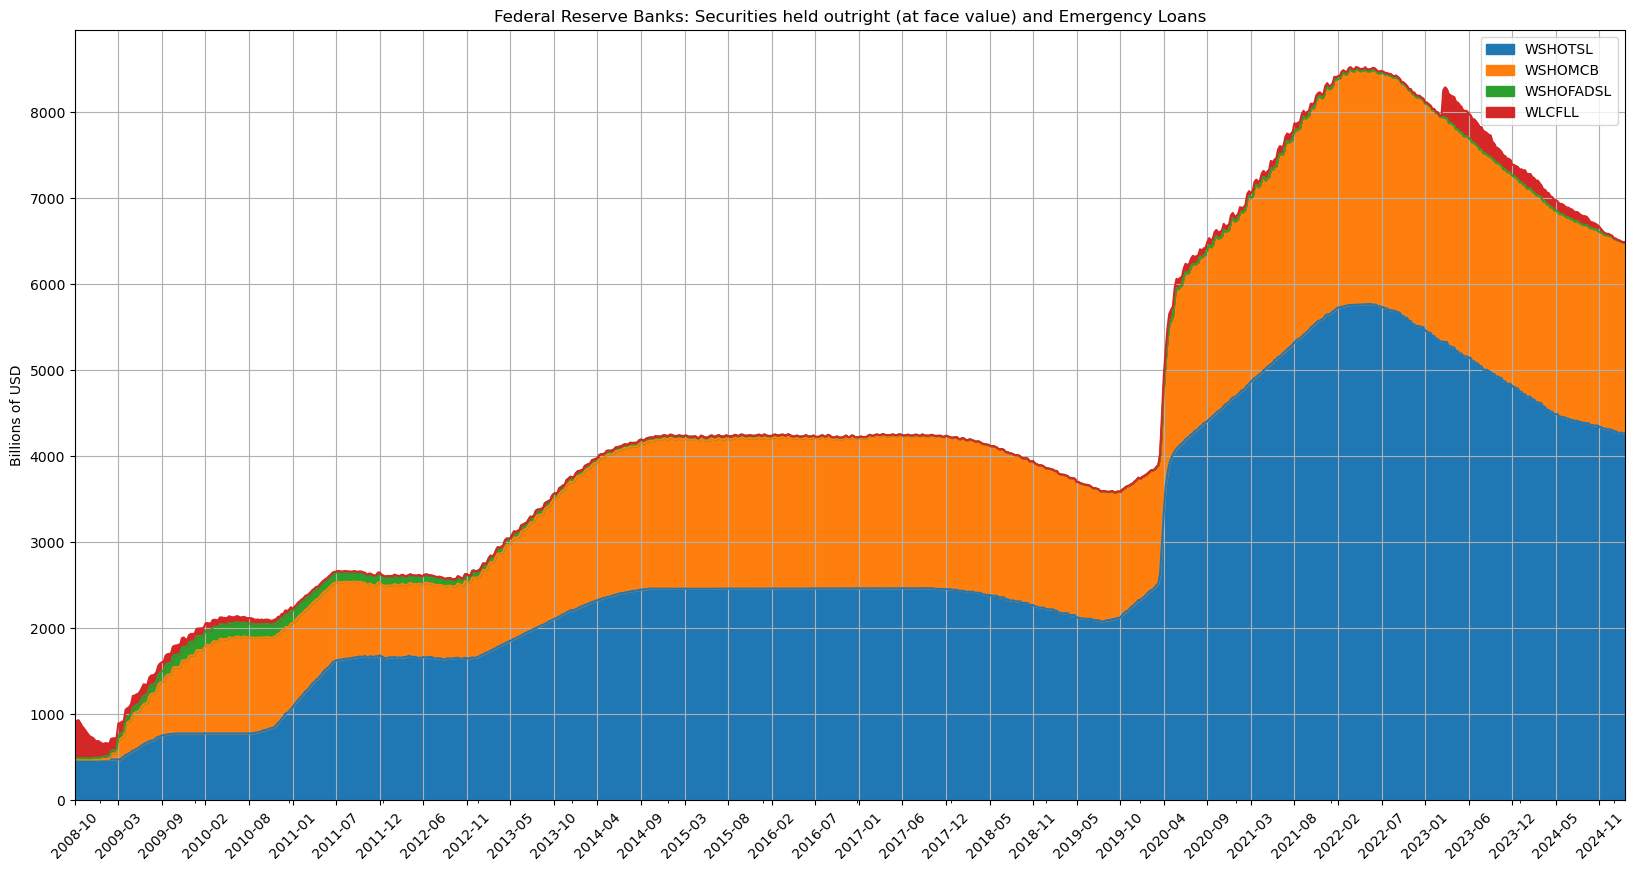

In [16]:
ax = sec_held_outright.iloc[:,:4].plot.area(figsize=(20,10), grid=True, title=SEC_HELD_OUTRIGHT_AND_LOANS_COMPOSITION_TITLE,
                          xticks=sec_held_outright.index[::24], xlabel='', rot=45,
                          ylabel=LEFT_Y_AXIS_LABEL) #, yticks=np.arange(0, 25e3, 2.5e3))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright.index[::24])))


[Markdown: Does this chart approximate what was presented in lecture?]

Yes -- this looks just like the FED balance sheet since 2005 that was presented in lecture. (Week 5 lecture 2, slide 13).

In [18]:
# Resampling to month start
sec_held_outright = sec_held_outright.resample('MS').last()

#Generating a table view
sec_held_outright

#To get a sense of speed of implementation of QE, we look at first differences
sec_held_outright_speed = (sec_held_outright - sec_held_outright.shift(1)).dropna()


sec_held_outright_speed.loc['2020-01':, sec_held_outright_speed.columns[[0,1,3,4]]].tail(12)

,WSHOTSL,WSHOMCB,WLCFLL,WORAL
DATE,,,,
2024-03-01,$-43.17bn,$-14.80bn,$-26.64bn,$-0.00bn
2024-04-01,$-78.28bn,$-3.72bn,$-6.44bn,$0.01bn
2024-05-01,$-50.35bn,$-30.08bn,$-17.92bn,$0.00bn
2024-06-01,$-35.87bn,$-18.64bn,$-1.29bn,$-0.00bn
2024-07-01,$-39.96bn,$-17.81bn,$-4.73bn,$0.00bn
2024-08-01,$-14.89bn,$-18.39bn,$-8.58bn,$-0.01bn
2024-09-01,$-14.59bn,$-17.72bn,$-13.44bn,$0.06bn
2024-10-01,$-26.31bn,$-16.11bn,$-28.24bn,$-0.03bn
2024-11-01,$-34.69bn,$-16.98bn,$-38.43bn,$-0.03bn


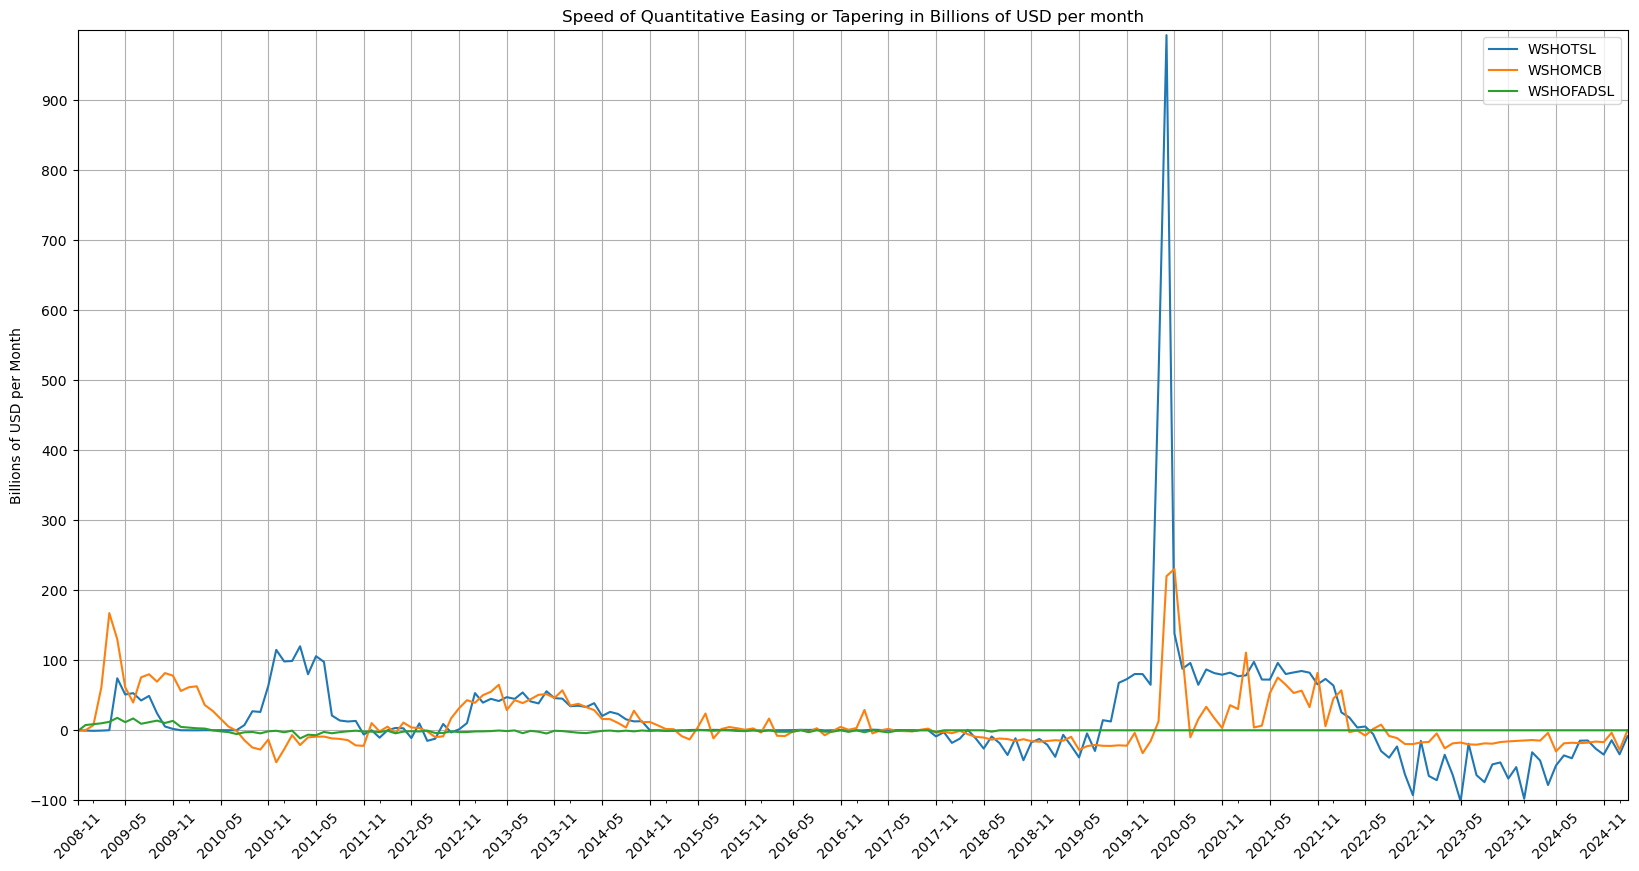

In [20]:
ax = sec_held_outright_speed.iloc[:,:3].plot(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED,
                            xticks=sec_held_outright_speed.index[::6], xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED, ylim=(-100, 1000), yticks=np.arange(-100, 1000, 100))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed.index[::6])))

[Markdown: What observations can you make about speed dynamics revealed here?]


As I predicted, the periods of spending are correlated with national economic insecurity like during the Pandemic, there is a huge spike, and also during the 08 financial crisis. The extreme spike in 2020 was unprecedented, demonstrating how aggressive the Fed’s monetary response was compared to previous crises. 



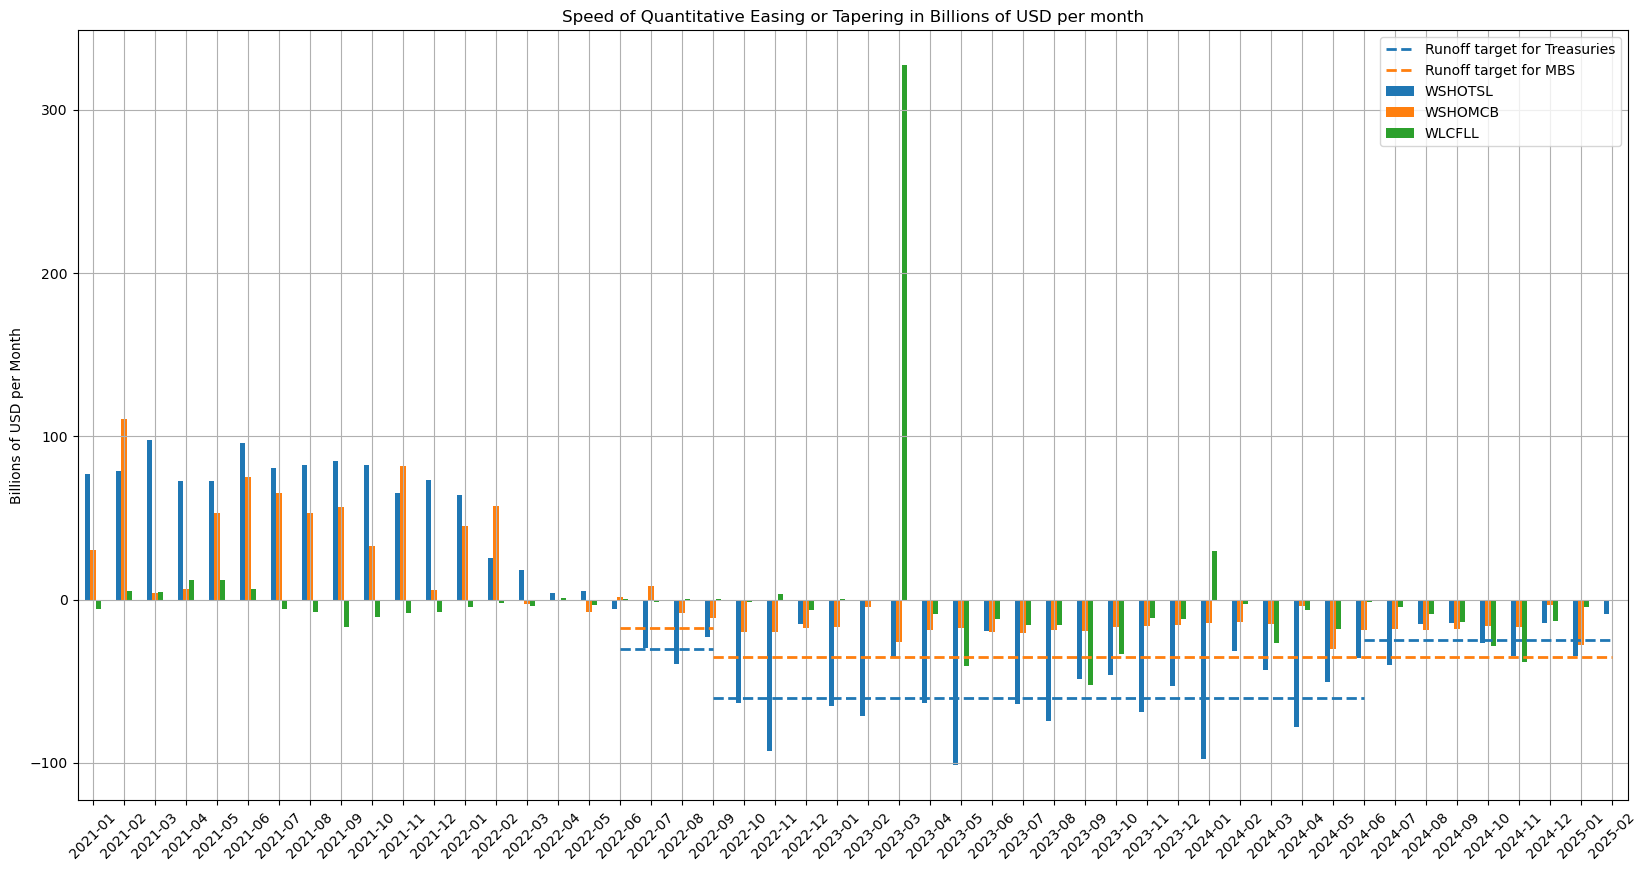

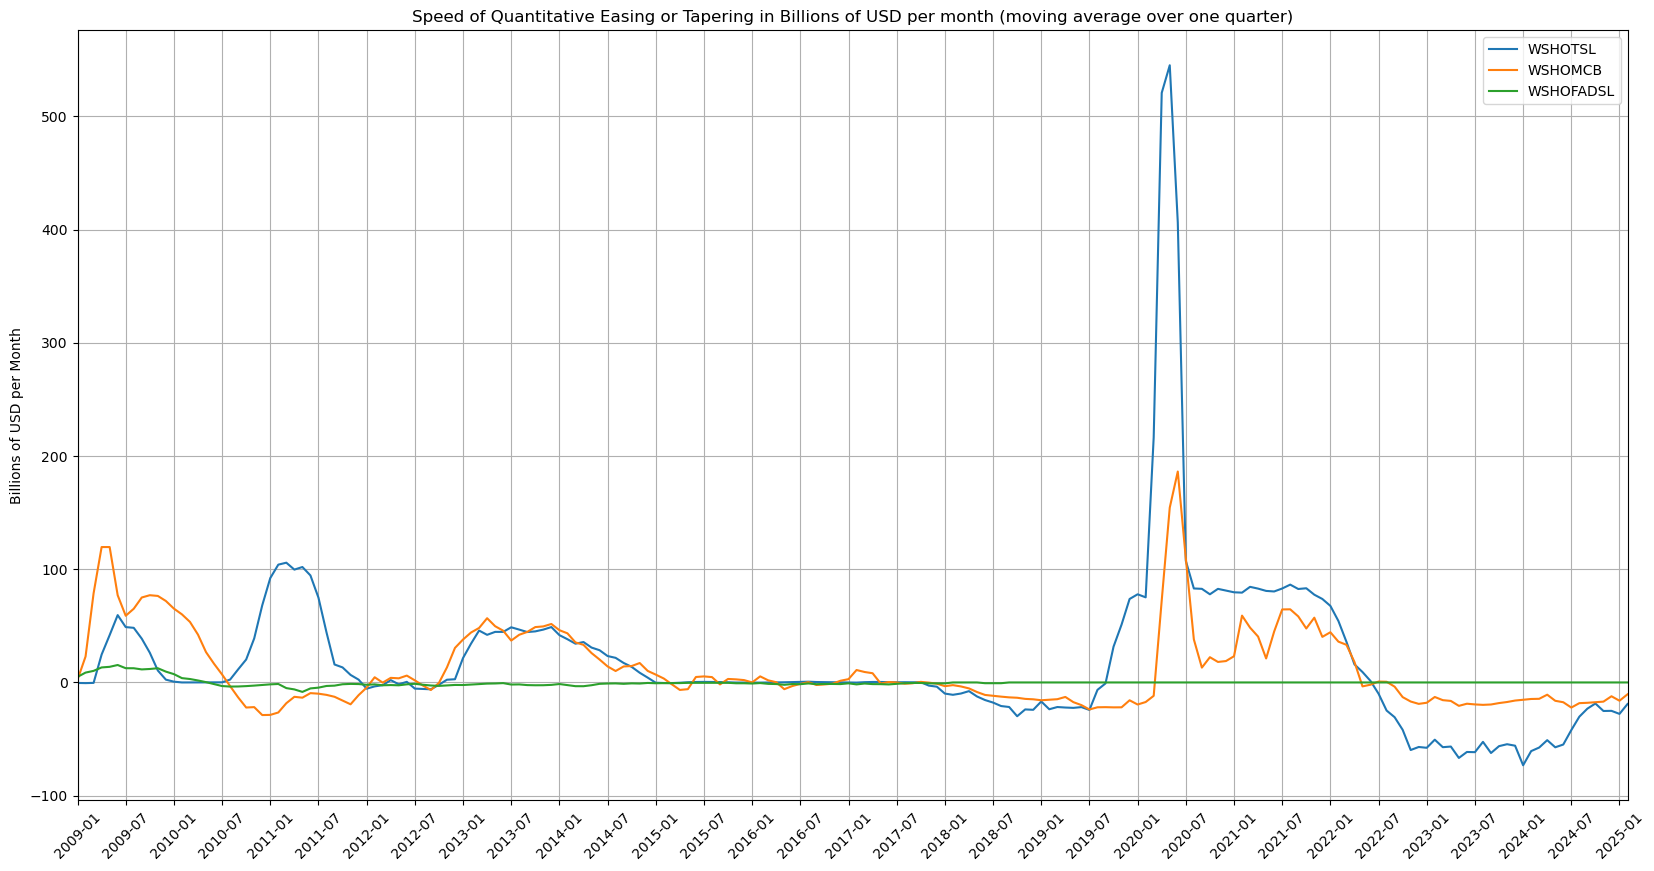

In [30]:
sec_held_outright_speed_short = sec_held_outright_speed.loc['2021':]




# Determine the index positions of the dates related to quantitative tightening
x1, x2, x3 = sec_held_outright_speed_short.index.get_indexer(['2022-06', '2022-09', '2024-06'])

ax = sec_held_outright_speed_short.iloc[:,[0,1,3]].plot.bar(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED, 
                            xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED)
# Translate them into coordinates
ax.hlines(y=[-30, -60, -25], xmin=[x1, x2, x3], xmax=[x2, x3, sec_held_outright_speed_short.index.size-1],
          linestyles='--', lw=2, colors='#1f77b4', label='Runoff target for Treasuries')
ax.hlines(y=[-17.5, -35], xmin=[x1, x2], xmax=[x2, sec_held_outright_speed_short.index.size-1],
          linestyles='--', lw=2, colors='#ff7f0e', label='Runoff target for MBS')
ax.legend()
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed_short.index)))


#"Runoff targets" refer to objectives related to letting certain holdings simply mature (rather than looking to later sell them).
#It is also sometimes referred to as "tapering".

sec_held_outright_speed_ma = sec_held_outright_speed.rolling(3).mean().dropna()

sec_held_outright_speed_ma.loc['2020-01':, sec_held_outright_speed_ma.columns[:2]]

ax = sec_held_outright_speed_ma.iloc[:,:3].plot(figsize=(20,10), grid=True,
                            title=SEC_HELD_OUTRIGHT_SPEED_MA,
                            xticks=sec_held_outright_speed_ma.index[::6], xlabel='', rot=45,
                            ylabel=LEFT_Y_AXIS_LABEL_SPEED)#, yticks=np.arange(-30, 21, 5))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, sec_held_outright_speed_ma.index[::6])))



[Markdown: What comments do you have on this perspective of tapering?]


The first graph shows tapering beginning in 2022, but then shows an emergency intervention in 2023, probably to get inflation under control by tightening monetary policy. The most spending the FED was doing -- by far -- was in 2020, which makes sense given what we know about the context. It makes sense to me that most of the time spands look like bell curves on the line, as the bond purchases need to end at some point and the spending goes back to regular. 

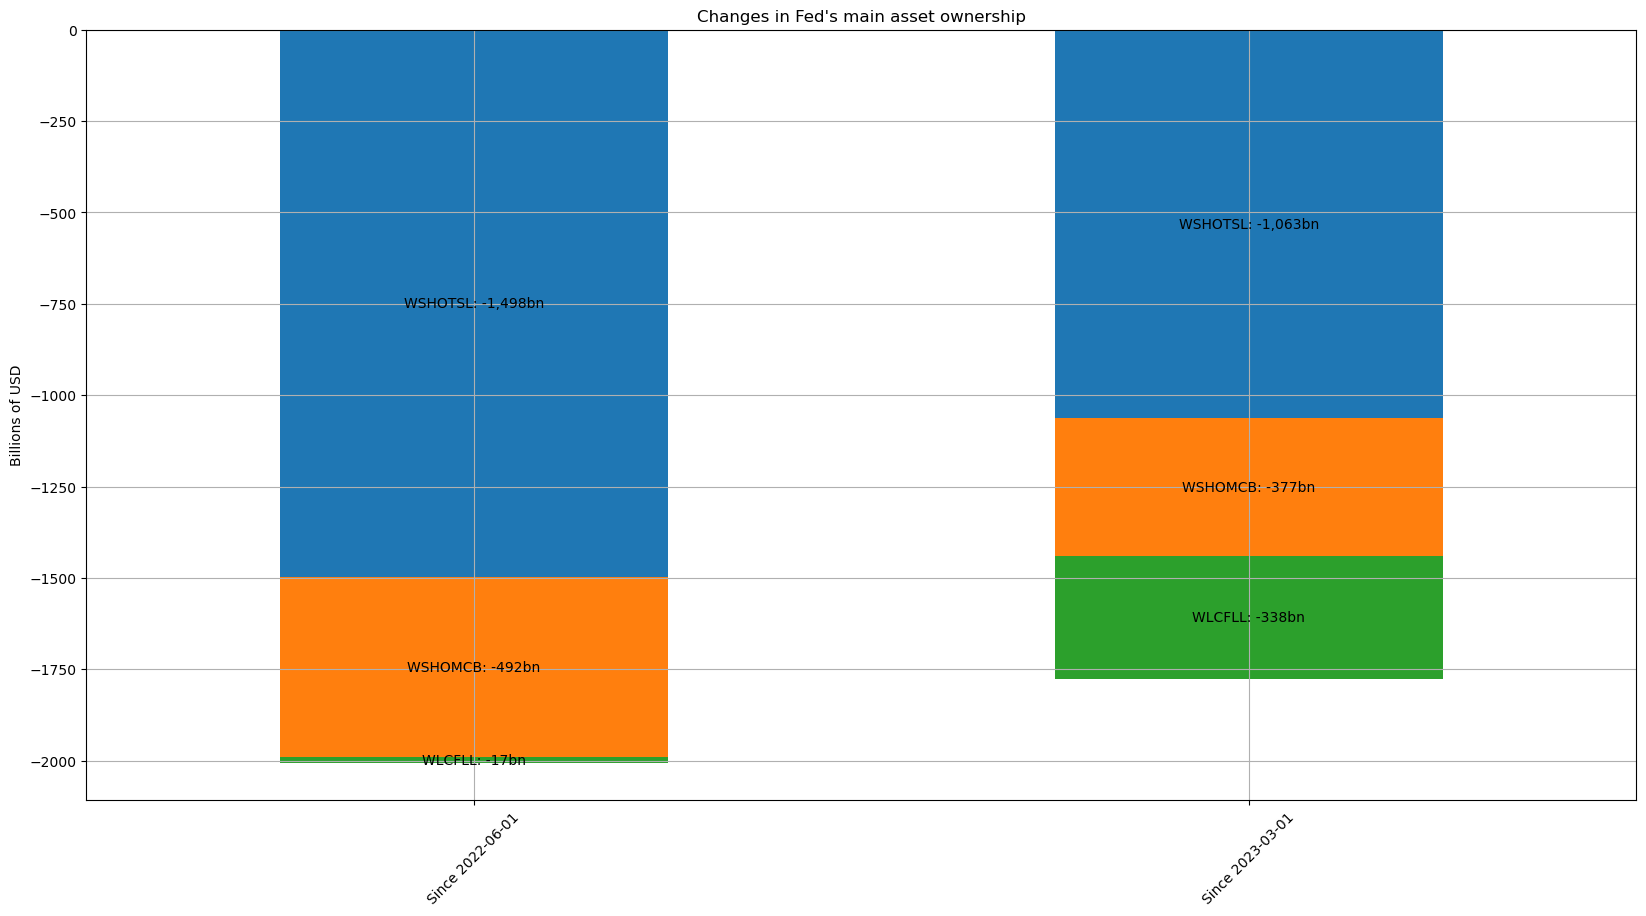

In [24]:

# Resampling to quarter start
sec_held_outright_2 = sec_held_outright.resample('QS').last()

sec_held_outright_2


sec_held_outright_speed_2 = (sec_held_outright_2 - sec_held_outright_2.shift(1)).dropna()

sec_held_outright_speed_2

#Having looked at monthly changes, let's have a look at the aggregate amounts of tapering

# From dates
periods = [date(2022, 6, 1), date(2023, 3, 1)]


df_changes = pd.DataFrame(
    [(sec_held_outright.iloc[-1] - sec_held_outright.loc[pd.to_datetime(period)]).iloc[[0,1,3]] for period in periods], 
    index=['Since {:%Y-%m-%d}'.format(period) for period in periods])


ax = df_changes.plot.bar(figsize=(20,10), grid=True, title="Changes in Fed's main asset ownership",
                         stacked=True, rot=45, ylabel=LEFT_Y_AXIS_LABEL)
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:+,.0f}bn', label_type='center')

[Markdown: What do you observe in the context of observed changes in porfolio composition?]

Total securites held outright have lessened as well as MBS.
From 2022-2023 the FED greatly increased their emergency lending programs or credit facilities (green segment). This suggests there was emergency lending because of a crisis. 



[Markdown: Create any two charts or tables of your choosing to present another perspective of the portfolio. What other insights
have you generated?] 







